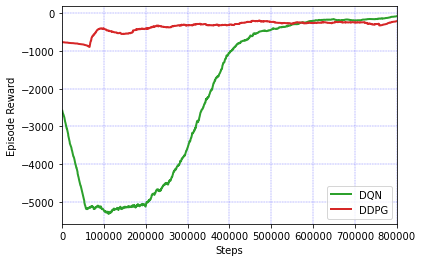

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
#sns.set('poster', palette='colorblind')
#sns.set('notebook', palette='colorblind')

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def reward(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
        #data.fillna(0)

    if 'episode' not in data:
        raise ValueError('Log file "{}" does not contain the "episode" key.'.format(filename))
    episodes = data['nb_steps']

    # Get value keys. The x axis is shared and is the number of episodes.
    keys = sorted(list(set(data.keys()).difference(set(['episode']))))
    x = data['nb_steps']
    y = data[keys[int(1)]]
    return x,y

x,y = reward('Weights/dqn_log.json')
y_smooth = smooth(y,200)
plt.figure(figsize=(6,4))
plt.plot(x, y_smooth, label = 'DQN', color='tab:green', linewidth=2)
x,y = reward('Weights/ddpg_log.json')
y_smooth = smooth(y,200)
plt.plot(x, y_smooth, label = 'DDPG', color='tab:red', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Episode Reward')
plt.xlim(0,800000)
plt.legend()
plt.grid(color='b', ls = '-.', lw = 0.25)
#plt.savefig('Reward_position.svg', format='svg', dpi=1200)

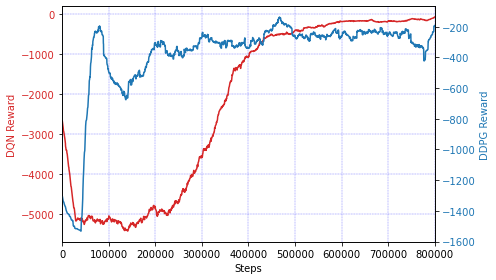

In [2]:
fig, ax1 = plt.subplots(figsize=(7,4))

color = 'tab:red'
ax1.set_xlabel('Steps')
ax1.set_ylabel('DQN Reward', color=color)
x,y = reward('Weights/dqn_log.json')
y_smooth = smooth(y,100)
#y_smooth = smooth(y_smooth,50)
ax1.plot(x, y_smooth, color=color, label = 'DQN Reward')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('DDPG Reward', color=color)  # we already handled the x-label with ax1
x,y = reward('Weights/ddpg_log.json')
y_smooth = smooth(y,100)
#y_smooth = smooth(y_smooth,100)
ax2.plot(x, y_smooth, color=color, label = 'DDPG Reward')
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(color='b', ls = '-.', lw = 0.25)
ax1.set_xlim([0, 800000])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('Reward_position_2.svg', format='svg', dpi=1200)